In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import awkward as ak
import os
import time
import dask 
import dask.dataframe as ddf
import warnings
import pickle

In [2]:
warnings.filterwarnings('ignore', 'The fastparquet')

In [3]:
# path = "/project01/ndcms/cmoore24/skims/stitch_test_skims/3200toInf/"
# start = time.time()
# print(len(os.listdir(path)))
# filelist = os.listdir(path)#[:files]
# q32inf = pd.concat((pd.read_parquet(f"{path}{f}", engine='fastparquet') for f in filelist)).reset_index(drop=True)
# super_stop = time.time()
# lasted = (super_stop-start)/60
# print(f"{lasted} minutes")

In [4]:
with open('./qcd_vars.pkl', 'rb') as f:
    output = pickle.load(f)

In [5]:
pt_347 = np.asarray(output['300to470']['FatJets.pt'].values.tolist())
pt_476 = np.asarray(output['470to600']['FatJets.pt'].values.tolist())
pt_68 = np.asarray(output['600to800']['FatJets.pt'].values.tolist())
pt_810 = np.asarray(output['800to1000']['FatJets.pt'].values.tolist())
pt_1014 = np.asarray(output['1000to1400']['FatJets.pt'].values.tolist())
pt_1418 = np.asarray(output['1400to1800']['FatJets.pt'].values.tolist())
pt_1824 = np.asarray(output['1800to2400']['FatJets.pt'].values.tolist())
pt_2432 = np.asarray(output['2400to3200']['FatJets.pt'].values.tolist())
pt_32inf = np.asarray(output['3200toInf']['FatJets.pt'].values.tolist())

In [6]:
l347 = len(pt_347)
l476 = len(pt_476)
l68 = len(pt_68)
l810 = len(pt_810)
l1014 = len(pt_1014)
l1418 = len(pt_1418)
l1824 = len(pt_1824)
l2432 = len(pt_2432)
l32inf = len(pt_32inf)

In [7]:
IL = 44.99
xs_300to470 = 6833
xs_470to600 = 549.5
xs_600to800 = 156.5
xs_800to1000 = 26.22
xs_1000to1400 = 7.475
xs_1400to1800 = 0.6482
xs_1800to2400 = 0.08742
xs_2400to3200 = 0.005237
xs_3200toInf = 0.0001353

In [8]:
s347 = ((xs_300to470*1000)*IL)/l347
s476 = ((xs_470to600*1000)*IL)/l476
s68 = ((xs_600to800*1000)*IL)/l68
s810 = ((xs_800to1000*1000)*IL)/l810
s1014 = ((xs_1000to1400*1000)*IL)/l1014
s1418 = ((xs_1400to1800*1000)*IL)/l1418
s1824 = ((xs_1800to2400*1000)*IL)/l1824
s2432 = ((xs_2400to3200*1000)*IL)/l2432
s32inf = ((xs_3200toInf*1000)*IL)/l32inf

In [9]:
stot = s347 + s476 + s68 + s810 + s1014 + s1418 + s2432 + s32inf

In [10]:
sval_347 = s347/stot
sval_476 = s476/stot
sval_68 = s68/stot
sval_810 = s810/stot
sval_1014 = s1014/stot
sval_1418 = s1418/stot
sval_1824 = s1824/stot
sval_2432 = s2432/stot
sval_32inf = s32inf/stot

In [11]:
pt_347_combed = pt_347[np.random.rand(pt_347.shape[0]) < sval_347]
pt_476_combed = pt_476[np.random.rand(pt_476.shape[0]) < sval_476]
pt_68_combed = pt_68[np.random.rand(pt_68.shape[0]) < sval_68]
pt_810_combed = pt_810[np.random.rand(pt_810.shape[0]) < sval_810]
pt_1014_combed = pt_1014[np.random.rand(pt_1014.shape[0]) < sval_1014]
pt_1418_combed = pt_1418[np.random.rand(pt_1418.shape[0]) < sval_1418]
pt_1824_combed = pt_1824[np.random.rand(pt_1824.shape[0]) < sval_1824]
pt_2432_combed = pt_2432[np.random.rand(pt_2432.shape[0]) < sval_2432]
pt_32inf_combed = pt_32inf[np.random.rand(pt_32inf.shape[0]) < sval_32inf]

In [12]:
tst = np.concatenate((pt_347_combed,
                pt_476_combed,
                pt_68_combed,
                pt_810_combed,
                pt_1014_combed,
                pt_1418_combed,
                pt_1824_combed,
                pt_2432_combed,
                pt_32inf_combed
               )
              )

In [13]:
with open('../../qcd_check/qcd_pt.pkl', 'rb') as f:
    qcd = pickle.load(f)

In [14]:
#QCD scale factors
scales300to470 = (((xs_300to470*1000)*IL)/(qcd[0]['QCD_Pt_300to470_TuneCP5_13TeV_pythia8']['QCD_Pt_300to470']['entries']))
scales470to600 = (((xs_470to600*1000)*IL)/(qcd[0]['QCD_Pt_470to600_TuneCP5_13TeV_pythia8']['QCD_Pt_470to600']['entries']))
scales600to800 = (((xs_600to800*1000)*IL)/(qcd[0]['QCD_Pt_600to800_TuneCP5_13TeV_pythia8']['QCD_Pt_600to800']['entries']))
scales800to1000 = (((xs_800to1000*1000)*IL)/(qcd[0]['QCD_Pt_800to1000_TuneCP5_13TeV_pythia8']['QCD_Pt_800to1000']['entries']))
scales1000to1400 = (((xs_1000to1400*1000)*IL)/(qcd[0]['QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8']['QCD_Pt_1000to1400']['entries']))
scales1400to1800 = (((xs_1400to1800*1000)*IL)/(qcd[0]['QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8']['QCD_Pt_1400to1800']['entries']))
scales1800to2400 = (((xs_1800to2400*1000)*IL)/(qcd[0]['QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8']['QCD_Pt_1800to2400']['entries']))
scales2400to3200 = (((xs_2400to3200*1000)*IL)/(qcd[0]['QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8']['QCD_Pt_2400to3200']['entries']))
scales3200toInf = (((xs_3200toInf*1000)*IL)/(qcd[0]['QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8']['QCD_Pt_3200toInf']['entries']))

In [15]:
scales300to470, scales470to600, scales600to800, scales800to1000

(15.3708335, 1.2251960055505997, 0.35204675, 0.0587586072922893)

In [16]:
qcd[0]['QCD_Pt_300to470_TuneCP5_13TeV_pythia8']['QCD_Pt_300to470']['Jet_Pt'].view(flow=True)[:] *= scales300to470
qcd[0]['QCD_Pt_470to600_TuneCP5_13TeV_pythia8']['QCD_Pt_470to600']['Jet_Pt'].view(flow=True)[:] *= scales470to600
qcd[0]['QCD_Pt_600to800_TuneCP5_13TeV_pythia8']['QCD_Pt_600to800']['Jet_Pt'].view(flow=True)[:] *= scales600to800
qcd[0]['QCD_Pt_800to1000_TuneCP5_13TeV_pythia8']['QCD_Pt_800to1000']['Jet_Pt'].view(flow=True)[:] *= scales800to1000
qcd[0]['QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8']['QCD_Pt_1000to1400']['Jet_Pt'].view(flow=True)[:] *= scales1000to1400
qcd[0]['QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8']['QCD_Pt_1400to1800']['Jet_Pt'].view(flow=True)[:] *= scales1400to1800
qcd[0]['QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8']['QCD_Pt_1800to2400']['Jet_Pt'].view(flow=True)[:] *= scales1800to2400
qcd[0]['QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8']['QCD_Pt_2400to3200']['Jet_Pt'].view(flow=True)[:] *= scales2400to3200
qcd[0]['QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8']['QCD_Pt_3200toInf']['Jet_Pt'].view(flow=True)[:] *= scales3200toInf

In [17]:
qcd_pt = (qcd[0]['QCD_Pt_300to470_TuneCP5_13TeV_pythia8']['QCD_Pt_300to470']['Jet_Pt']+
        qcd[0]['QCD_Pt_470to600_TuneCP5_13TeV_pythia8']['QCD_Pt_470to600']['Jet_Pt']+
        qcd[0]['QCD_Pt_600to800_TuneCP5_13TeV_pythia8']['QCD_Pt_600to800']['Jet_Pt']+
        qcd[0]['QCD_Pt_800to1000_TuneCP5_13TeV_pythia8']['QCD_Pt_800to1000']['Jet_Pt']+
        qcd[0]['QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8']['QCD_Pt_1000to1400']['Jet_Pt']+
        qcd[0]['QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8']['QCD_Pt_1400to1800']['Jet_Pt']+
        qcd[0]['QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8']['QCD_Pt_1800to2400']['Jet_Pt']+
        qcd[0]['QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8']['QCD_Pt_2400to3200']['Jet_Pt']+
        qcd[0]['QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8']['QCD_Pt_3200toInf']['Jet_Pt'])

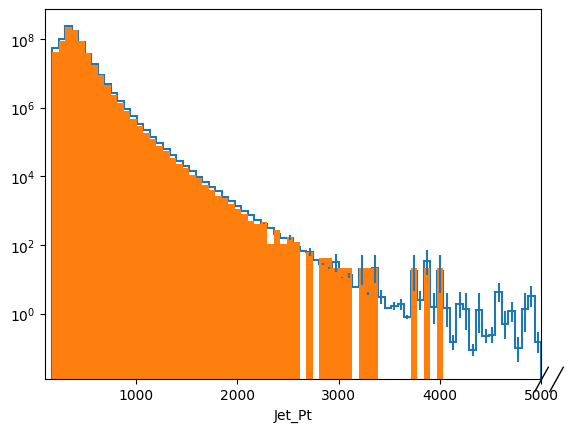

In [18]:
fig, ax = plt.subplots()
qcd_pt.plot(ax=ax)
plt.hist(tst, range=(170,5000), bins=75, weights=21*np.ones_like(tst)
        )
plt.yscale('log')
plt.xlim(100, 5000)
plt.show()